<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования-и-Проверка-алгоритма" data-toc-modified-id="Алгоритм-преобразования-и-Проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования и Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
data = pd.read_csv('/datasets/insurance.csv')

Пол


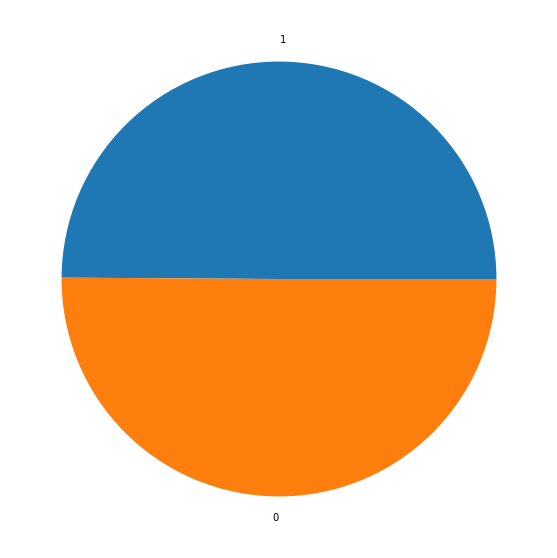

Возраст


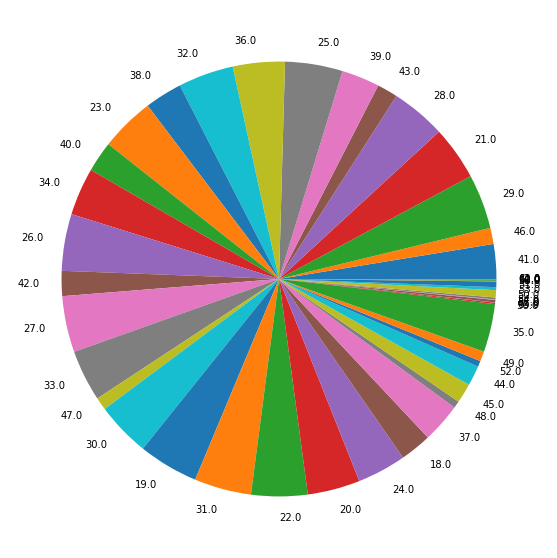

Члены семьи


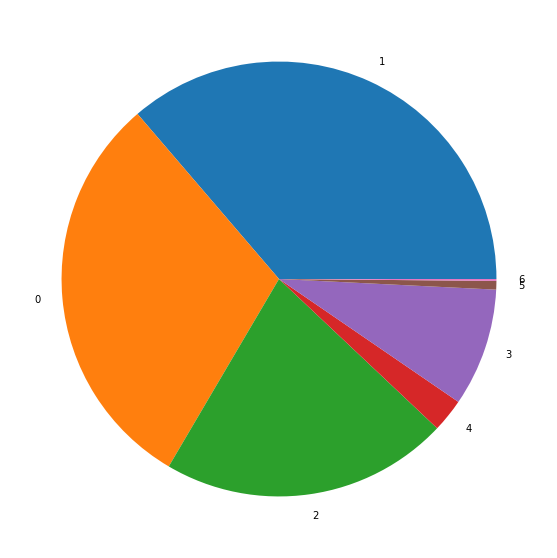

Страховые выплаты


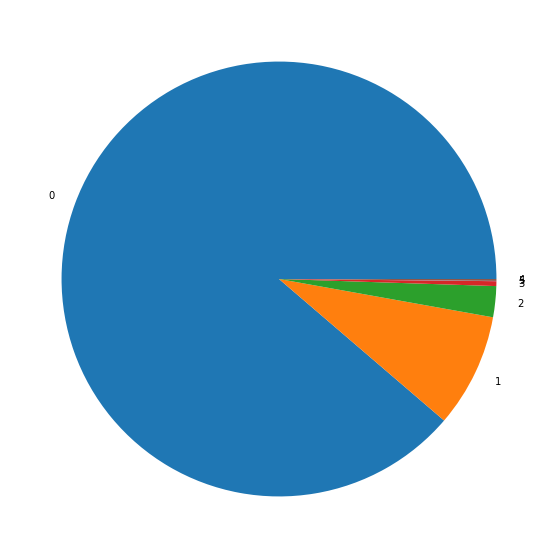

In [109]:
for column in data.columns[data.columns!= 'Зарплата']:
    counts = []
    col = []
    for value in data[column].unique():
        counts.append((data[column] == value).sum())
        col.append(value)
    print(column)    
    fig1, ax1 = plt.subplots(figsize=(15,10))    
    ax1.pie(counts,labels=col);
    plt.show();

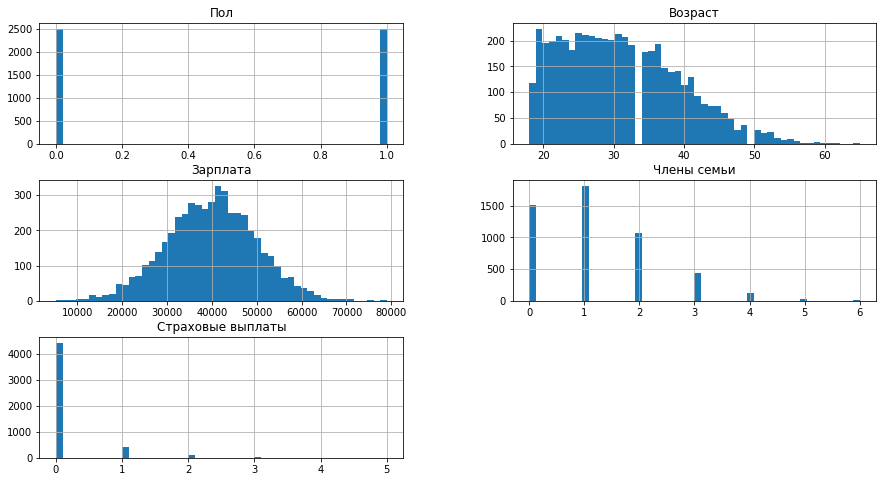

In [18]:
data.hist(figsize=(15,8),bins = 50);

In [5]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
data.duplicated().sum()

153

In [8]:
data[data.duplicated()].sort_values(by='Зарплата',ascending=False)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
1742,1,28.0,59900.0,0,0
2231,0,33.0,59300.0,2,0
2465,0,40.0,54000.0,2,0
1281,1,24.0,53900.0,2,0
3150,0,23.0,53600.0,1,0
...,...,...,...,...,...
1140,1,34.0,26900.0,0,0
2723,0,36.0,26400.0,0,0
4230,0,32.0,25600.0,1,0
2869,0,50.0,24700.0,1,2


In [9]:
data = data[~data.duplicated()]

In [10]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится

**Обоснование**

1.Создаём случайную и обратимую матриу $P$, которую умножим на матрицу признаков $X$, таким образом получим новую матрицу $XP$.

2.Подставляем полученную матрицу в формулу вектора весов 
$ \omega_1 = ((XP)^T(XP))^{-1}(XP)^Ty $.

3.Делаем следующие преобразования $(XP)^T = P^TX^T \\
((XP)^T(XP))^{-1} = (P^T(X^TX)P)^{-1} = P^{-1}(X^TX)^{-1}(P^T)^{-1}
$.

4.Получаем соотношения для нового вектора весов и старого $ \omega_1 = P^{-1}\omega $.

5.Тогда предсказание будем иметь вид:$ a = XPP^{-1}\omega = X\omega $

6.Чтд.

## Алгоритм преобразования и Проверка алгоритма

**Алгоритм**

1.Создаём случайную и обратимую матриу $P$, которую умножим на матрицу признаков $X$, таким образом получим новую матрицу $XP$.

2.Проверяем матрицу на обратимость, т.е. вычисляем $P^{-1}$.

3.Затем домножаем матрицу признаков на случайную матрицу и полуаем $XP$.

4.Обучаем нашу модель уже по новым признакам и смотрим как поменялись метрики.

**Обоснование**

Обоснование представленно в пункте 2.


Разобьём датасет выборки (признаки и цели) и промасшатибруем признаки.

In [110]:
features = data.drop(['Страховые выплаты'],axis=1)
target = data['Страховые выплаты']
scaler = StandardScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

In [111]:
features_train,features_other,target_train,target_other = train_test_split(features,target,
                                                                         test_size=0.3,random_state=12345)
features_valid,features_test,target_valid,target_test = train_test_split(features_other,target_other
                                                                         ,test_size=0.5,random_state=12345)

Используем модель линейной регрессии.

In [112]:
def Linear(features_t,target_t,features_v,target_v):
    model = LinearRegression()
    model.fit(features_t,target_t)
    prediction = model.predict(features_v)
    score = model.score(features_v,target_v)
    mse = mean_squared_error(target_v,prediction)
    return print('Score:',score,'MSE:', mse)

In [113]:
print('Валидационная выборка до преобразования:')
Linear(features_train,target_train,features_valid,target_valid)

Валидационная выборка до преобразования:
Score: 0.42780107779332754 MSE: 0.1024617536698081


In [114]:
print('Тестовая выборка до преобразования:')
Linear(features_train,target_train,features_test,target_test)

Тестовая выборка до преобразования:
Score: 0.4325244264481508 MSE: 0.13360039596426282


In [116]:
rand_matrix = np.random.randint (-100, 100, (4, 4))
rand_matrix

array([[-19, -98, -58,  12],
       [ 99, -12,  -2, -73],
       [ 14,   4,  15,  79],
       [ 10, -38,  19, -22]])

In [117]:
inv_rand_matrix = linalg.inv(rand_matrix)
inv_rand_matrix

array([[ 0.00051444,  0.00946607,  0.00769256, -0.00350625],
       [-0.00510062,  0.00073089, -0.00234819, -0.01363954],
       [-0.00842603, -0.00451334,  0.00366517,  0.02354136],
       [ 0.00176697, -0.00085758,  0.01071797, -0.00315791]])

In [118]:
features_matrix = np.array(features)
features_matrix

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [119]:
features_new = features_matrix.dot(rand_matrix)
features_new

array([[ 698450.,  197772.,  743879., 3915397.],
       [ 536564.,  151410.,  569927., 2998620.],
       [ 296871.,   83652.,  314942., 1656883.],
       ...,
       [ 476600.,  135284.,  508498., 2676596.],
       [ 459989.,  130324.,  490455., 2581640.],
       [ 571163.,  161928.,  608905., 3205346.]])

In [120]:
features_train,features_other,target_train,target_other = train_test_split(features_new,target,
                                                                         test_size=0.3,random_state=12345)
features_valid,features_test,target_valid,target_test = train_test_split(features_other,target_other
                                                                         ,test_size=0.5,random_state=12345)

In [121]:
print('Валидационная выборка после преобразования:')
Linear(features_train,target_train,features_valid,target_valid)

Валидационная выборка после преобразования:
Score: 0.42780107779331444 MSE: 0.10246175366981046


In [122]:
print('Тестовая выборка после преобразования:')
Linear(features_train,target_train,features_test,target_test)

Тестовая выборка после преобразования:
Score: 0.43252442644815714 MSE: 0.13360039596426132


Вывод: метрики не изменились, данные зашифрованы.

Общий вывод: 

1. Был загружен датасет и убраны дупликаты

2. Доказано, что умножение признаков на обратимую матрицу не меняет метрик линейной регресии

3. Был предложен, показан и обоснован алгоритм шифрования личных данных пользвателей.
